# 3. Pie Charts, Box Plots, Scatter Plots, Bubble Plots, Waffle Charts, Word Cloud, Regression

## Downloading and Prepping Data

In [12]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [13]:
df = pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [14]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [15]:
df.shape

(195, 43)

In [16]:
df.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [17]:
df.drop(['Type', 'Coverage', 'AREA', 'REG', 'DEV'], axis=1, inplace=True)
df.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace=True)
df.columns = df.columns.map(str)
df.set_index(['Country'], inplace=True)
df['Total'] = df.sum(axis=1)

print('data dimensions:', df.shape)
print('columns:', df.columns.values)
df.head()

data dimensions: (195, 38)
columns: ['Continent' 'Region' 'DevName' '1980' '1981' '1982' '1983' '1984' '1985'
 '1986' '1987' '1988' '1989' '1990' '1991' '1992' '1993' '1994' '1995'
 '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005'
 '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' 'Total']


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [18]:
years = list(map(str, range(1980, 2014)))

## Visualizing Data using Matplotlib

In [39]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts
from PIL import Image # converting images into arrays

mpl.style.use('ggplot') 
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  2.2.3


### Pie Charts

Step 1: Gather data. 

We will use *pandas* `groupby` method to summarize the immigration data by `Continent`. The general process of `groupby` involves the following steps:

1. **Split:** Splitting the data into groups based on some criteria.
2. **Apply:** Applying a function to each group independently:
       .sum()
       .count()
       .mean() 
       .std() 
       .aggregate()
       .apply()
       .etc..
3. **Combine:** Combining the results into a data structure.

<img src="https://ibm.box.com/shared/static/tkfhxqkehfzpclco8f0eazhie33uxj9j.png" height=400 align="center">

In [20]:
df_continents = df.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
print(type(df.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


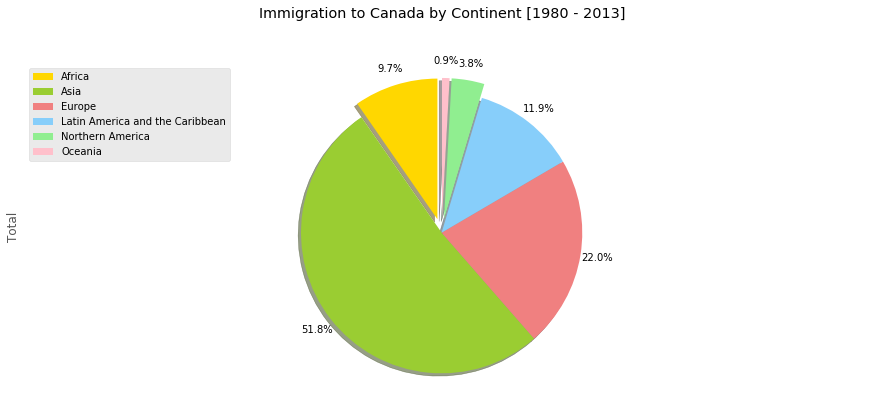

In [21]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] 
# ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15,6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,        
                            labels=None,               
                            pctdistance=1.12,           # the ratio between the center of each pie slice and the start of the text generated by autopct
                            colors=colors_list,        
                            explode=explode_list,      # 'explode' lowest 3 continents
                           )

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

### Box Plots
A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions: 

- **Minimun:** Smallest number in the dataset.
- **First quartile:** Middle number between the `minimum` and the `median`.
- **Second quartile (Median):** Middle number of the (sorted) dataset.
- **Third quartile:** Middle number between `median` and `maximum`.
- **Maximum:** Highest number in the dataset.
<img src="https://ibm.box.com/shared/static/9nkxsfihu8mgt1go2kfasf61sywlu123.png" width=440, align="center">

In [22]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_Japan = df.loc[['Japan'], years].transpose()
df_Japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


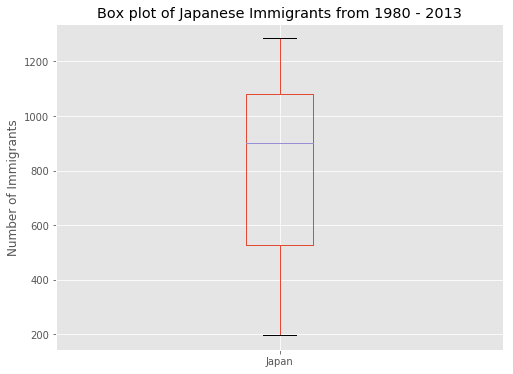

In [23]:
df_Japan.plot(kind='box',
              figsize=(8,6),              
             )

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [24]:
df_Japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [25]:
Ctrs = ['China', 'India']
Ctrs_str = ', '.join(Ctrs)

In [26]:
df_Ctrs = df.loc[Ctrs, years].transpose()
df_Ctrs.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


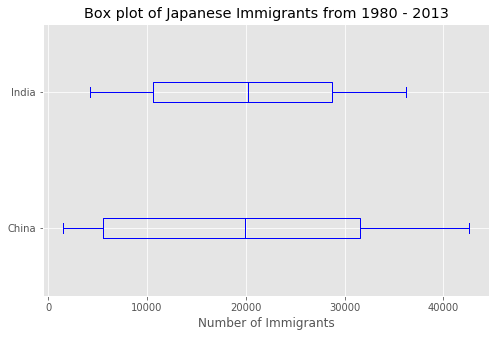

In [27]:
df_Ctrs.plot(kind='box',
             figsize=(8,5),
             color='blue',
             vert=False,
            )

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.xlabel('Number of Immigrants')

plt.show()

### Subplots

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**. 

Typical syntax is : <br>
```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```
Where
- `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,  
- `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` * `ncols` as shown below.

<img src="https://ibm.box.com/shared/static/03rhrfcealyoi83tigscovgglfchfyor.png" width=500 align="center">

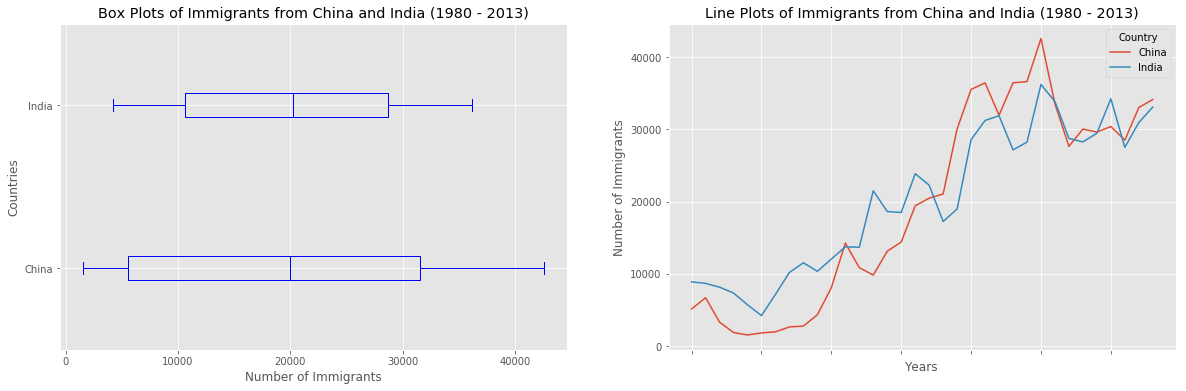

In [28]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, 1st plot)
ax1 = fig.add_subplot(1,2,2)

# 1st plot
df_Ctrs.plot(kind='box',
             color='blue',
             vert=False,
             figsize=(20,6),
             ax=ax0,        # add to subplot
            )
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_ylabel('Countries')
ax0.set_xlabel('Number of Immigrants')

# 2nd plot
df_Ctrs.plot(kind='line',
             figsize=(20,6),
             ax=ax1,
            )
ax1.set_title('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

**Tip regarding subplot convention**

In the case when `nrows`, `ncols`, and `plot_number` are all less than 10, a convenience exists such that the a 3 digit number can be given instead, where the hundreds represent `nrows`, the tens represent `ncols` and the units represent `plot_number`. For instance,
```python
   subplot(211) == subplot(2, 1, 1) 
```
produces a subaxes in a figure which represents the top plot (i.e. the first) in a 2 rows by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned).

In [29]:
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top15 = df.head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [56]:
year80s = list(map(str,range(1980,1990)))
year90s = list(map(str,range(1990,2000)))
year00s = list(map(str,range(2000,2010)))

# slice the original dataframe df_can to create a series for each decade
total_80s = df_top15.loc[:, year80s].sum(axis=1)
total_90s = df_top15.loc[:, year90s].sum(axis=1)
total_00s = df_top15.loc[:, year00s].sum(axis=1)

df_decades = pd.DataFrame({'1980s': total_80s,
                          '1990s': total_90s,
                          '2000s': total_00s})

df_decades.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [57]:
df_decades.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


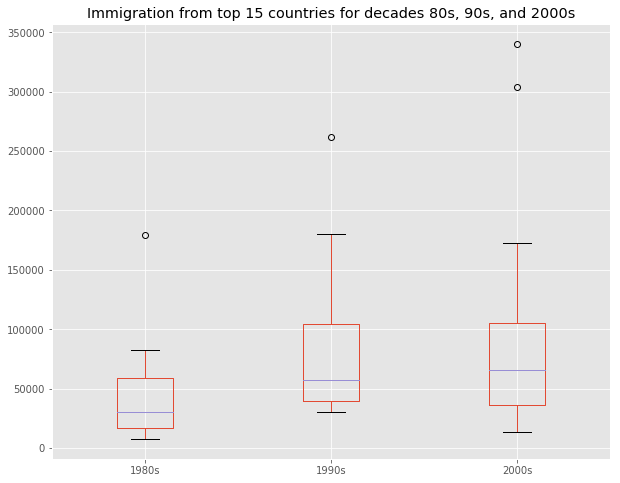

In [59]:
df_decades.plot(kind='box',
                figsize=(10, 8) ,
               )

plt.title('Immigration from top 15 countries for decades 80s, 90s, and 2000s')

plt.show()

Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:<br>
* larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
* smaller than Q1 by at least 1.5 times the IQR.

Let's look at decade 2000s as an example: <br>
* Q1 (25%) = 36,101.5 <br>
* Q3 (75%) = 105,505.5 <br>
* IQR = Q3 - Q1 = 69,404 <br>

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 * 69,404) <br>
Outlier > 209,611.5

In [63]:
# let's check how many entries fall above the outlier threshold 
df_decades[df_decades['2000s']> 209611.5]

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385


### Scatter Plots
A `scatter plot` (2D) is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. While the datapoints are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

Let's start by exploring the following:

Using a `scatter plot`, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

Step 1: Get the dataset. Since we are expecting to use the relationship betewen `years` and `total population`, we will convert `years` to `int` type.

In [65]:
df_total = pd.DataFrame(df[years].sum(axis=0))
df_total.head()

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


In [66]:
df_total.index = map(int, df_total.index)
df_total.head()

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


In [72]:
df_total.reset_index(inplace=True)
#df_total.drop(['level_0'], axis=1, inplace=True)

df_total.head()

,index,0
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [73]:
df_total.columns = ['year', 'total']
df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Step 2: Plot the data. In `Matplotlib`, we can create a `scatter` plot set by passing in `kind='scatter'` as plot argument. We will also need to pass in `x` and `y` keywords to specify the columns that go on the x- and the y-axis.

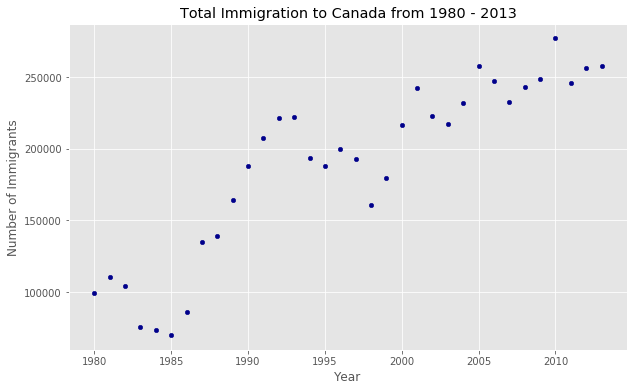

In [74]:
df_total.plot(kind='scatter',
              x = 'year',
              y = 'total',
              figsize=(10,6),
              color='darkblue',
             )

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

So let's try to plot a linear line of best fit, and use it to  predict the number of immigrants in 2015.

Step 1: Get the equation of line of best fit. We will use **Numpy**'s `polyfit()` method by passing in the following:

In [77]:
x = df_total['year']         # x-coordinates of the data.
y = df_total['total']        # y-coordinates of the data.
fit = np.polyfit(x,y,deg=1)  # Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

print(fit)

[ 5.56709228e+03 -1.09261952e+07]


Output: `y= a*x + b`

Step 2: Plot the regression line on the `scatter plot`.

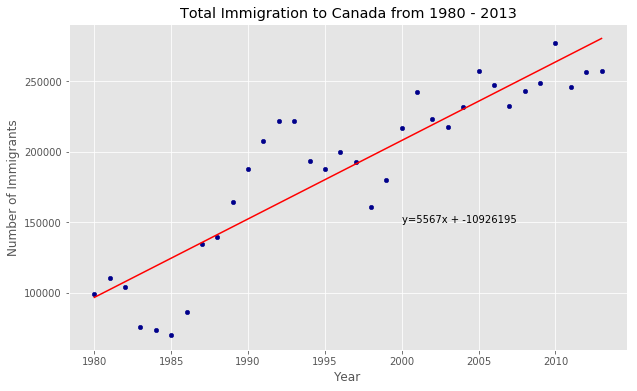

'No. Immigrants = 5567 * Years + -10926195'

In [79]:
df_total.plot(kind='scatter',
              x='year',
              y='total',
              figsize=(10,6),
              color='darkblue',
             )

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.0f}x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Years + {1:.0f}'.format(fit[0], fit[1])

Using the equation of line of best fit, we can estimate the number of immigrants in 2015:
```python
No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310
```
When compared to the actuals from Citizenship and Immigration Canada's (CIC) [2016 Annual Report](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp), we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from United Nations (and might differ slightly from CIC data).

As a side note, we can observe that immigration took a dip around 1993 - 1997. Further analysis into the topic revealed that in 1993 Canada introcuded Bill C-86 which introduced revisions to the refugee determination system, mostly restrictive. Further amendments to the Immigration Regulations cancelled the sponsorship required for "assisted relatives" and reduced the points awarded to them, making it more difficult for family members (other than nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years.

In [80]:
countries = ['Denmark', 'Norway', 'Sweden']
countries_str = ', '.join(countries) 

In [102]:
df_countries = df.loc[countries, years]
df_countries = df_countries.transpose()
df_countries.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


In [116]:
df_countries_total = pd.DataFrame(df_countries.sum(axis=1))
df_countries_total.index = df_countries_total.index.map(int)
df_countries_total.reset_index(inplace=True)
df_countries_total.columns=['year', 'Immigrants']
df_countries_total.head()

,year,Immigrants
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


In [119]:
x = df_countries_total['year']         # x-coordinates of the data.
y = df_countries_total['Immigrants']        # y-coordinates of the data.
fit = np.polyfit(x,y,deg=1)  # Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

print(fit)

[-6.14698243e+00  1.26281563e+04]


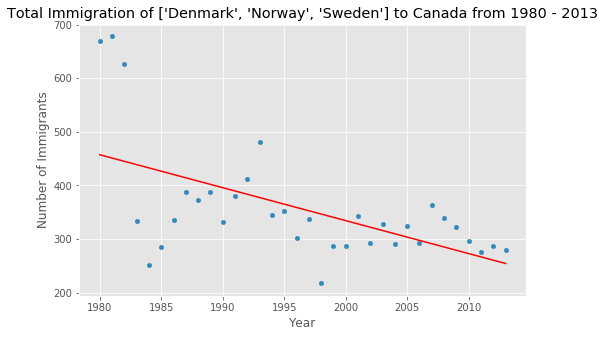

'No. Immigrants = -6 * Years + 12628'

In [121]:
df_countries_total.plot(kind='scatter',
                        figsize=(8,5),
                        x = 'year',
                        y = 'Immigrants'
                       )
plt.title('Total Immigration of %s to Canada from 1980 - 2013' % countries)
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.0f}x + {1:.0f}'.format(fit[0], fit[1]), xy=(0, 0))
plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Years + {1:.0f}'.format(fit[0], fit[1])

### Bubble Plots <a id="12"></a>

A `bubble plot` is a variation of the `scatter plot` that displays three dimensions of data (x, y, z). The datapoints are replaced with bubbles, and the size of the bubble is determined by the third variable 'z', also known as the weight. In `maplotlib`, we can pass in an array or scalar to the keyword `s` to `plot()`, that contains the weight of each point.

**Let's start by analyzing the effect of Argentina's great depression**.

Argentina suffered a great depression from 1998 - 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002. 

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the *normalized* value of the population for each year.

Step 1: Get the data for Brazil and Argentina. Like in the previous example, we will convert the `Years` to type int and bring it in the dataframe.

In [127]:
df_T = df[years].transpose()
df_T.index = map(int,df_T.index)
df_T.index.name = 'year'
df_T.reset_index(inplace=True)
df_T.head()

Country,year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


Step 2: Create the normalized weights. 

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling) to bring all values into the range [0,1]. The general formula is:

<img src="https://ibm.box.com/shared/static/3e43kt5j9wj4326x1lh8z2jeqzgpk3jv.png" align="center">

where *`X`* is an original value, *`X'`* is the normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the datapoints are scaled to a value between 0-1 accordingly.


In [129]:
norm_Brz = (df_T['Brazil'] - df_T['Brazil'].min()) \
         / (df_T['Brazil'].max() - df_T['Brazil'].min())

norm_Arg = (df_T['Argentina'] - df_T['Argentina'].min()) \
         / (df_T['Argentina'].max() - df_T['Argentina'].min())

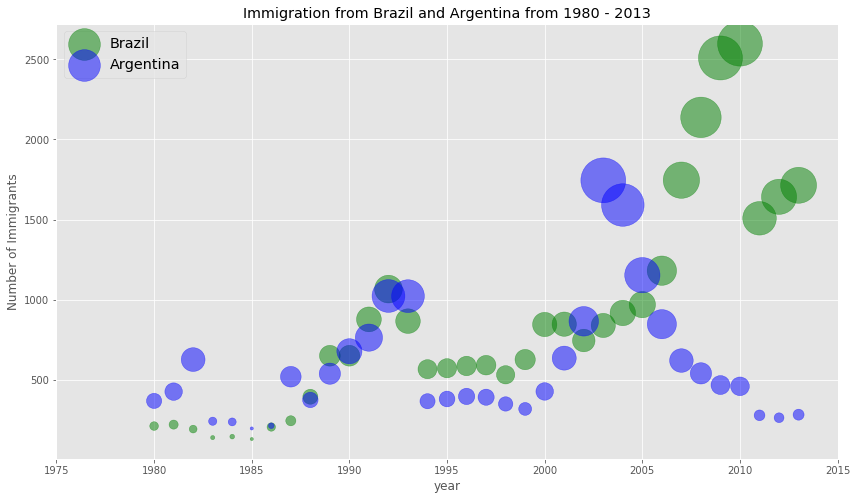

In [136]:
ax0 = df_T.plot(kind='scatter',
                x = 'year',
                y = 'Brazil',
                figsize=(14,8),
                alpha=0.5,
                color='green',
                s=norm_Brz*2000+10,    # pass in weights to bubbles
                xlim=(1975,2015),
               )

ax1 = df_T.plot(kind='scatter',
                x = 'year',
                y = 'Argentina',
                figsize=(14,8),
                alpha=0.5,
                color='blue',
                s=norm_Arg*2000+10,    
                xlim=(1975,2015),
                ax = ax0               # draw within ax0
               )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble, the more immigrants in that year.

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 - 1990, just before the onset of 1998 - 2002 great depression. 

On a similar note, Brazil suffered the *Samba Effect* where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.

In [147]:
df_T = df[years].transpose()
df_T.index = map(int, df_T.index)
df_T.index.name = 'Year'
df_T.reset_index(inplace=True)
df_T.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


In [149]:
norm_Cn = (df_T['China'] - df_T['China'].min()) / (df_T['China'].max() - df_T['China'].min())
norm_Ind = (df_T['India'] - df_T['India'].min()) / (df_T['India'].max() - df_T['India'].min())

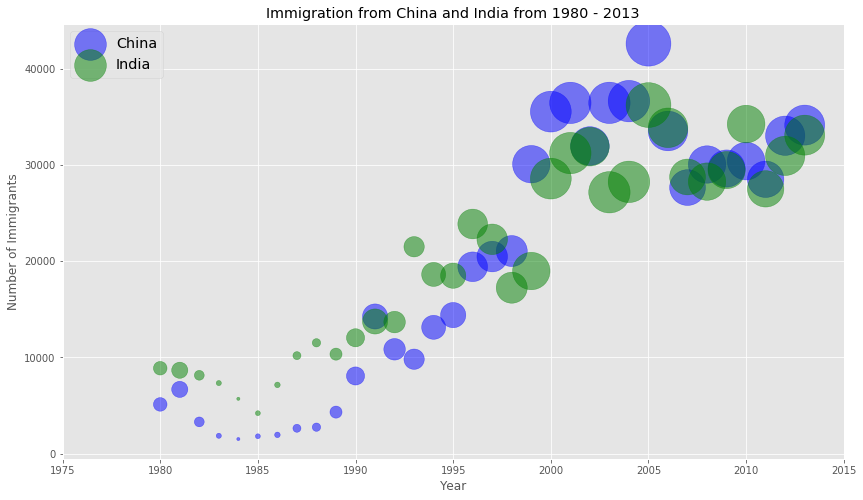

In [151]:
ax0 = df_T.plot(kind='scatter',
                  x = 'Year',
                  y = 'China',
                  s = norm_Cn * 2000 + 10,
                  color='blue', 
                  figsize=(14,8),
                  alpha=0.5,
                  xlim=(1975,2015),
                 )
ax0 = df_T.plot(kind='scatter',
                  x = 'Year',
                  y = 'India',
                  s = norm_Cn * 2000 + 10,
                  color='green', 
                  figsize=(14,8),
                  alpha=0.5,
                  xlim=(1975,2015),
                  ax=ax0,
                 )
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

### Waffle Charts

**step 0.** Get DataFrame

In [9]:
countries = ['Denmark', 'Norway', 'Sweden']
countries_str = ', '.join(countries) 

In [14]:
df_ctrs = df.loc[countries, :]
df_ctrs

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


**Step 1.** The first step into creating a waffle chart is determing the proportion of each category with respect to the total.

In [18]:
# compute the proportion of each category with respect to the total
ctrs_total = sum(df_ctrs['Total'])
category_proportions = [(float(value)/ctrs_total) for value in df_ctrs['Total']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print(df_ctrs.index.values[i] + ':' + str(proportion))

Denmark:0.32255663965602777
Norway:0.1924094592359848
Sweden:0.48503390110798744


**Step 2.** The second step is defining the overall size of the `waffle` chart.

In [21]:
# total number of tiles

width = 40
height = 10

total_tiles = width * height

print('Total number of tiles:', total_tiles)

Total number of tiles: 400


**Step 3.** The third step is using the proportion of each category to determe it respective number of tiles

In [22]:
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_tiles) for proportion in category_proportions]

#print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print(df_ctrs.index.values[i] + ':' + str(tiles))

Denmark:129
Norway:77
Sweden:194


**Step 4.** The fourth step is creating a matrix that resembles the `waffle` chart and populating it.

In [31]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_idx = 0
tile_idx = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_idx += 1
        
        # if the number of tiles populated for the current category \
        # equal to its corresponding allocated tiles
        if tile_idx > sum(tiles_per_category[0:category_idx]):
            # ...proceed to the next category
            category_idx += 1
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_idx
        
print ('Waffle chart populated')
waffle_chart

Waffle chart populated


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

**Step 5.** Map the `waffle` chart matrix into a visual.  
**Step 6.** Prettify the chart.  
**Step 7.** Create a legend and add it to chart.

<Figure size 432x288 with 0 Axes>

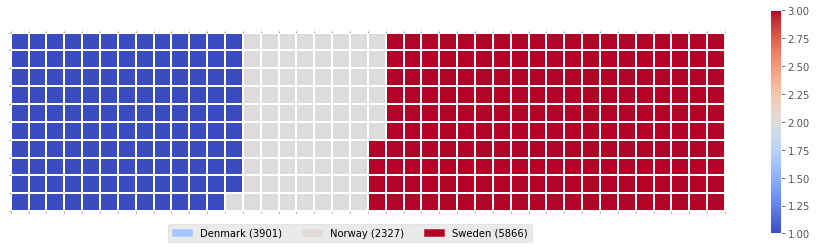

In [40]:
# Map the waffle chart matrix into a visual.

fig = plt.figure()
# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# Prettify the chart.

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# Create a legend and add it to chart.

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_ctrs['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_ctrs.index.values):
    label_str = category + ' (' + str(df_ctrs['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_ctrs.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

Now it would very inefficient to repeat these seven steps every time we wish to create a `waffle` chart. So let's combine all seven steps into one function called *create_waffle_chart*. This function would take the following parameters as input:

> 1. **categories**: Unique categories or classes in dataframe.
> 2. **values**: Values corresponding to categories or classes.
> 3. **height**: Defined height of waffle chart.
> 4. **width**: Defined width of waffle chart.
> 5. **colormap**: Colormap class
> 6. **value_sign**: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. **value_sign** has a default value of empty string.

#### def Waffle Function

In [56]:
def create_waffle_chart(dataframe, categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (dataframe.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

#### Using Waffle Function

In [59]:
countries = ['Denmark', 'Norway', 'Sweden']
countries_str = ', '.join(countries) 

df_ctrs = df.loc[countries, :]
df_ctrs

width = 40 # width of chart
height = 10 # height of chart

categories = df_ctrs.index.values # categories
values = df_ctrs['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

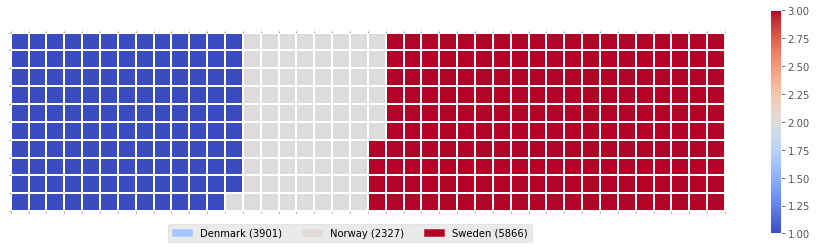

In [60]:
create_waffle_chart(df_ctrs, categories, values, height, width, colormap)

### Word Cloud
The package, called `word_cloud` was developed by **Andreas Mueller**. You can learn more about the package by following this [link](https://github.com/amueller/word_cloud/).


In [1]:
# install wordcloud
# !pip install wordcloud
# or --> # !conda install -c conda-forge wordcloud==1.4.1 --yes

Wordcloud is installed and imported!


In [6]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

In [5]:
# download file and save as alice_novel.txt
def curl_save(path, new_fname, fmodel='w'):
    import urllib.request, urllib.parse, urllib.error
    pos = path.find('/', -1)
    old_fname = path[pos+1:]

    file = urllib.request.urlopen(path).read()
    with open(new_fname, fmodel) as fhand:
        fhand.write(file)

In [ ]:
path = 'https://ibm.box.com/shared/static/m54sjtrshpt5su20dzesl5en9xa5vfz1.txt'
new_fname = 'alice_novel.txt'

curl_save(path, new_fname, fmodel)
print ('File downloaded and saved!')

In [8]:
alice_novel = open(new_fname).read()

In [7]:
stopwords = set(STOPWORDS)

In [10]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

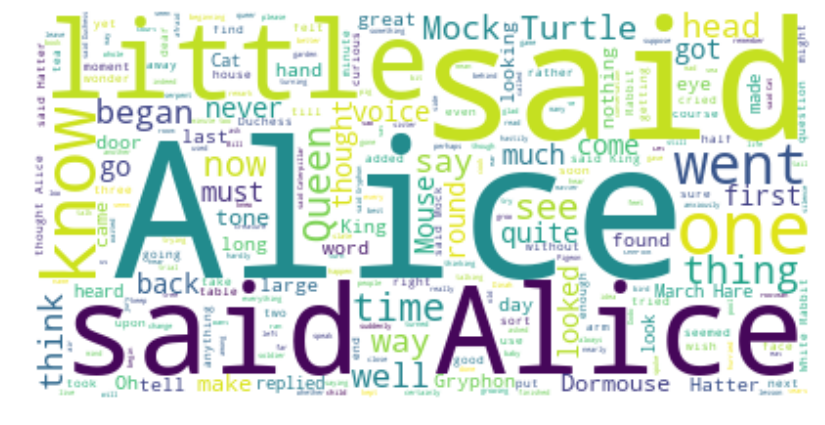

In [33]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Interesting! So in the first 2000 words in the novel, the most common words are **Alice**, **said**, **little**, **Queen**, and so on. Let's resize the cloud so that we can see the less frequent words a little better.

In [34]:
# download image
path = 'https://ibm.box.com/shared/static/3mpxgaf6muer6af7t1nvqkw9cqj85ibm.png'
new_fname = 'alice_mask.png'
fmodel = 'wb'

curl_save(path, new_fname, fmodel)
print ('File downloaded and saved!')

File downloaded and saved!


However, **said** isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.

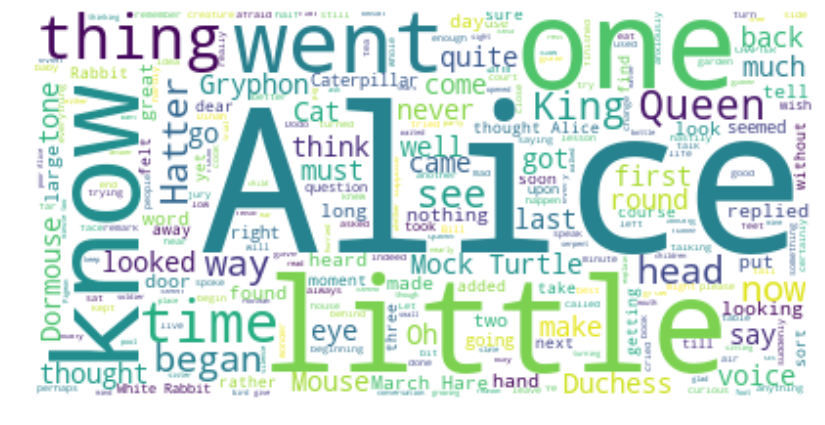

In [38]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

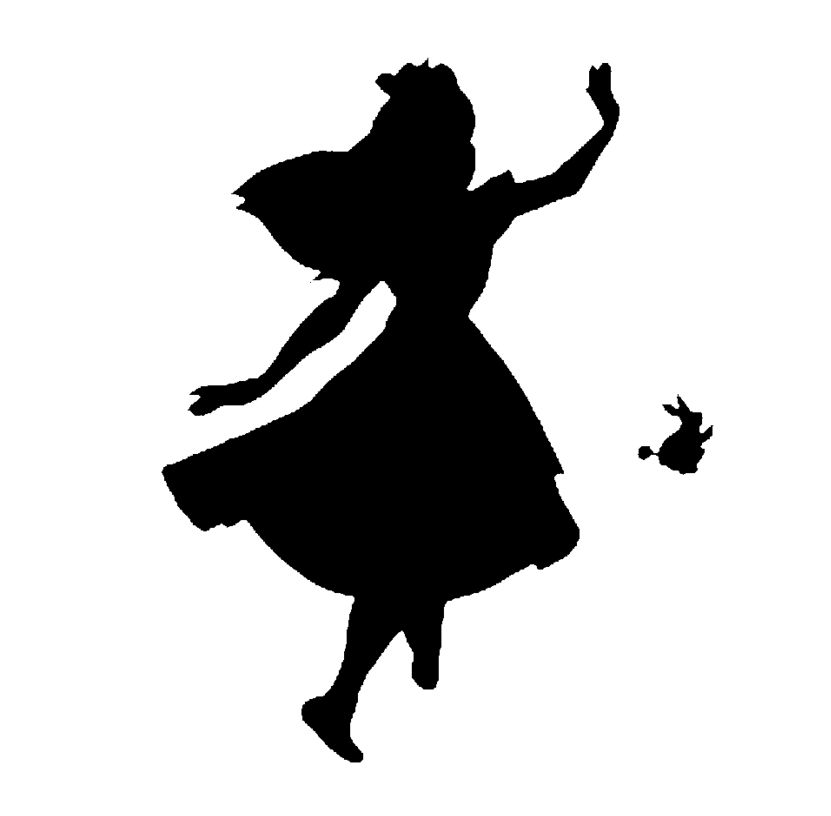

In [42]:
# convert img to float
alice_mask = np.array(Image.open('alice_mask.png'))

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

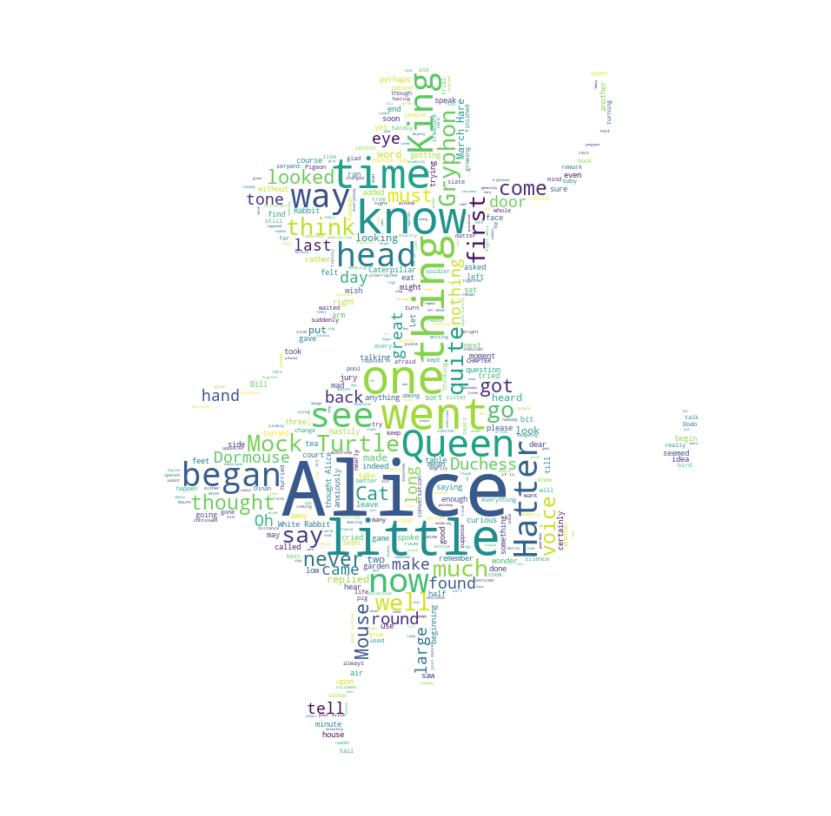

In [45]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white', 
    max_words=20000, 
    mask=alice_mask,
    stopwords=stopwords,
)

# generate the word cloud
alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Let's recall how our data looks like.

In [47]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [48]:
# total immigration from 1980 to 2013 across the world
total_immigration = df['Total'].sum()
total_immigration

6409153

Using countries with **single-word names**, let's duplicate each country's name based on how much they contribute to the total immigration.

In [54]:
max_words = 90
word_str =  ''

for country in df.index.values:
    
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        
        repeat_times = int(df.loc[country, 'Total']/float(total_immigration)*max_words)
        word_str = word_str + ((country + ' ') * repeat_times) 
        
# display the generated text
word_str

'India India India India India India India India India China China China China China China China China China Philippines Philippines Philippines Philippines Philippines Philippines Philippines Pakistan Pakistan Pakistan Poland Lebanon France Jamaica Romania Haiti Guyana Portugal Egypt Morocco Colombia '

In [56]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_str)

print('Word cloud created!')

Word cloud created!


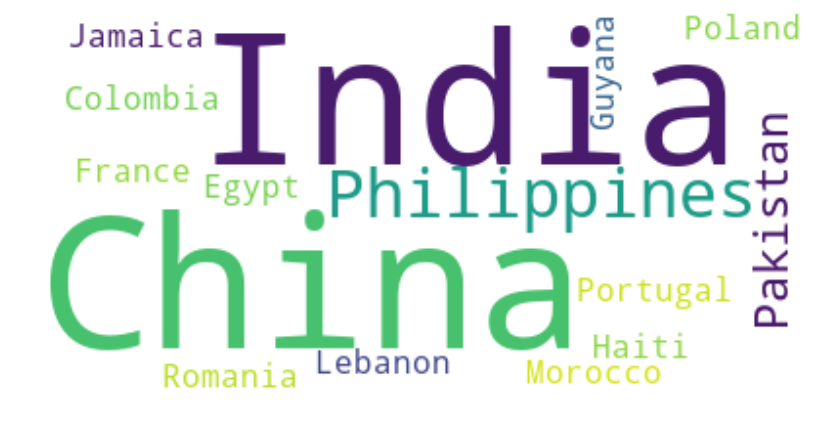

In [57]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Regression Plots
> Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. You can learn more about *seaborn* by following this [link](https://seaborn.pydata.org/) and more about *seaborn* regression plots by following this [link](http://seaborn.pydata.org/generated/seaborn.regplot.html).

In lab *Pie Charts, Box Plots, Scatter Plots, and Bubble Plots*, we learned how to create a scatter plot and then fit a regression line. It took ~20 lines of code to create the scatter plot along with the regression fit. In this final section, we will explore *seaborn* and see how efficient it is to create regression lines and fits using this library!

In [58]:
# install seaborn
# !pip install seaborn

# import library
import seaborn as sns

Create a new dataframe that stores that total number of landed immigrants to Canada per year from 1980 to 2013.

In [63]:
df_total = pd.DataFrame(df[years].sum(axis=0))
df_total.index = map(int, df_total.index)
df_total.reset_index(inplace=True)

df_total.head()

,index,0
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [65]:
df_total.columns = ['year', 'total']

df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


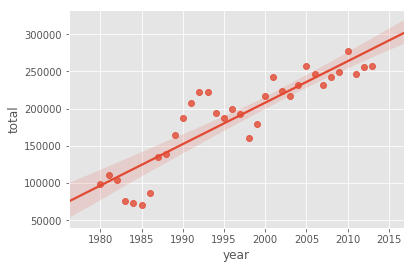

In [68]:
ax = sns.regplot(x='year', y='total', data=df_total)

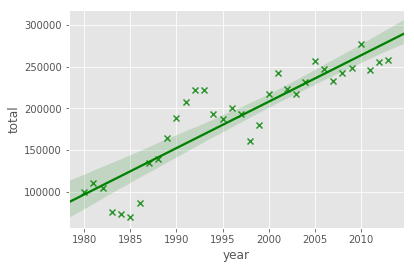

In [69]:
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='x')

Text(0.5,1,'Total Immigration to Canada from 1980 - 2013')

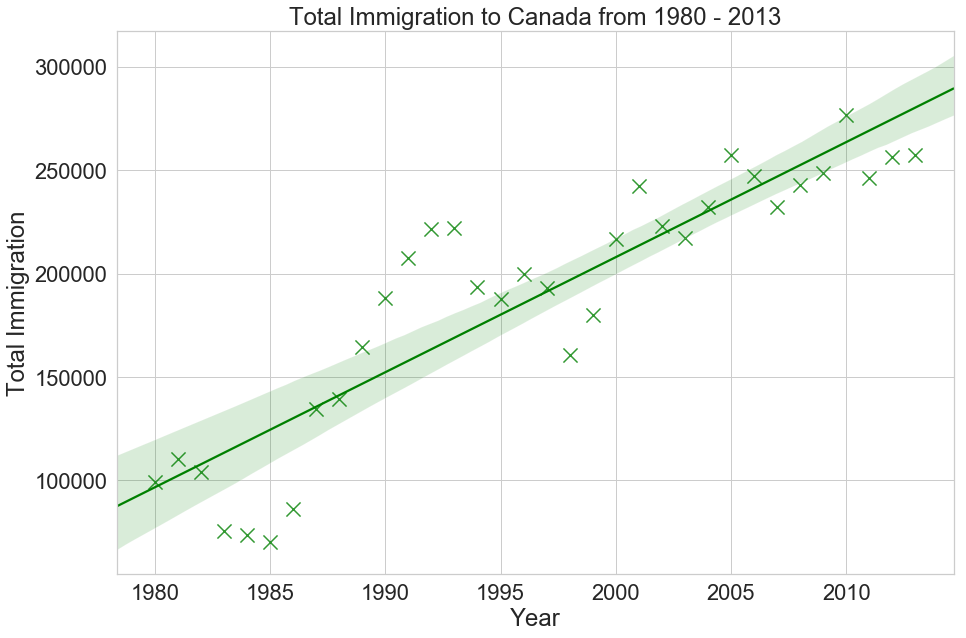

In [75]:
plt.figure(figsize=(15,10))

sns.set(font_scale=2)
#sns.set_style('ticks') # white background
sns.set_style('whitegrid') # white grid

ax = sns.regplot(x='year', y='total', data=df_total, 
                 color='green', marker='x',
                 scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
